# Master in Data Science  - Universidad Panamericana
## XRay Analyzer for Pneumonia Detection
### Deep Learning - Convolutional Neural Nets
##### Authors: Jorge Octavio Castro Rodriguez, Ernesto Perez Vazquez



## Breaking Down the Process of Model Building

Our process of image classification model will be divided into 4 stages. Each stage will be as follow:

   1. [Loading and pre-processing Data (40% estimated time)](#scrollTo=Lu-gK__n0okK)
   2. [Defining Model architecture (10% estimated time)](#scrollTo=NfBFdsoJ02Tt)
   3. [Training the model (40% estimated time)](#scrollTo=5dSBm3Dh07Eo)
   4. [Estimation of performance (10% estimated time)](#scrollTo=3OslCPZ20_kV)

## Stage 0: Importing necessary libraries

In [0]:
# Setting up libraries
import os
import re
import math
import psutil
import humanize
#import GPUtil as GPU
#import h5py
#import json
import time
from datetime import datetime
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Stage 1: Loading and pre-processing the data

In order to process the data we will follow the next steps:

1. We have to load all the files we have in our XRay folder


In [0]:
# Images path
projectPath = '/content/drive/My Drive/Proyecto_MLII/'
basePath = os.path.join(projectPath, 'ChestXRays')
paths = []

# Loading Labels and Images paths
for entry in os.listdir(basePath):
  basePath1 = os.path.join(basePath, entry)
  # Looping over all folders
  for i in os.listdir(basePath1):
    varType = i 
    path = os.path.join(basePath1, varType)
    fileName = os.listdir(path)
    # Looping over all images
    for nFile in fileName:
      # Appending data into dictImages
      paths.append(os.path.join(path, nFile))

2. We have to label each file ('normal', 'bacteria', 'virus')
3. We have to preprocessesing each image convert to a grey scale and we have to rezise the image
4. We have to convert the image into an array of rescaled data
5. We have to save all the data processed into a dictionary

In [6]:
size = 256
rangeFiles = range(0, len(paths))
start_time = datetime.now().strftime("%H:%M:%S")
data = {'labels' : [], 'imgArray' : []}

for nFiles in rangeFiles:
  exec_start_time = time.clock()

  # Labeling the XRay images (Step 2)  
  if re.match("^.*_bacteria_.*$", paths[nFiles]):
    lab = 'bacteria'
  elif re.match("^.*_virus_.*$", paths[nFiles]):
    lab = 'virus'
  else: 
    lab = 'normal'
  
  # Image preprocessing  (Step 3 & 4)  
  images = image.load_img(paths[nFiles], target_size=(size,size),
                          color_mode = "grayscale")
  input_arr = np.array([image.img_to_array(images) / 255]).reshape(size,size,1)
    
  # Appending data (Step 5)
  data['labels'].append(lab)
  data['imgArray'].append(input_arr)
  
  #  print('\nSalida',nFiles)
  process = psutil.Process(os.getpid())
  print("Image Label: ", lab, "|   Image No: ", str(nFiles + 1),
        "|    Gen RAM Free: ", humanize.naturalsize(psutil.virtual_memory().available), 
        "|  Proc size: ", humanize.naturalsize(process.memory_info().rss),
        "|    Start:", start_time,
        "|    Current:", datetime.now().strftime("%H:%M:%S"),
        "|    Exec Time:", np.round(time.clock() - exec_start_time, 4))

#data = pd.DataFrame(data)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Image Label:  normal |   Image No:  876 |    Gen RAM Free:  12.6 GB |  Proc size:  630.0 MB |    Start: 16:01:44 |    Current: 16:06:34 |    Exec Time: 0.0148
Image Label:  normal |   Image No:  877 |    Gen RAM Free:  12.6 GB |  Proc size:  631.5 MB |    Start: 16:01:44 |    Current: 16:06:34 |    Exec Time: 0.0239
Image Label:  normal |   Image No:  878 |    Gen RAM Free:  12.6 GB |  Proc size:  631.5 MB |    Start: 16:01:44 |    Current: 16:06:34 |    Exec Time: 0.0114
Image Label:  normal |   Image No:  879 |    Gen RAM Free:  12.6 GB |  Proc size:  631.8 MB |    Start: 16:01:44 |    Current: 16:06:34 |    Exec Time: 0.0259
Image Label:  normal |   Image No:  880 |    Gen RAM Free:  12.6 GB |  Proc size:  631.8 MB |    Start: 16:01:44 |    Current: 16:06:35 |    Exec Time: 0.0216
Image Label:  normal |   Image No:  881 |    Gen RAM Free:  12.6 GB |  Proc size:  631.8 MB |    Start: 16:01:44 |    Current: 16:06:35 | 

6. Printing Counts and Percentages of the data

In [7]:
import collections

X = np.array(data['imgArray'])
y = np.array(data['labels'])

del data

print("Summary: \n",
      "Normal   - Count: {0} , Percentage: {1}%\n".format(
          collections.Counter(y)['normal'],
          np.round(collections.Counter(y)['normal'] / len(y) * 100, 3)),
      "Bacteria - Count: {0} , Percentage: {1}%\n".format(
          collections.Counter(y)['bacteria'],
          np.round(collections.Counter(y)['bacteria'] / len(y) * 100, 3)),
      "Virus    - Count: {0} , Percentage: {1}%".format(
          collections.Counter(y)['virus'],
          np.round(collections.Counter(y)['virus'] / len(y) * 100, 3)))

Summary: 
 Normal   - Count: 1583 , Percentage: 26.949%
 Bacteria - Count: 2788 , Percentage: 47.463%
 Virus    - Count: 1503 , Percentage: 25.587%


7. Plotting Labels counts

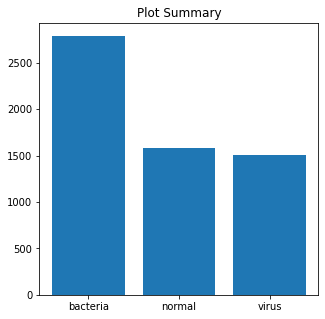

In [8]:
# Plotting XRay Labels
keys, counts = np.unique(y, return_counts=True)
plt.rcParams["figure.figsize"] = (5,5)
plt.bar(keys, counts)
plt.title("Plot Summary")
plt.show()

8. Printing a random XRay rescaled of each type

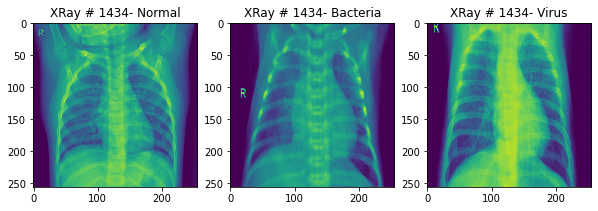

In [9]:
# Printing a random Xray
import random

X = np.asarray(X)

arrNormal = (X[y == 'normal'] * 255)
arrNormal = arrNormal.reshape(arrNormal.shape[0], size, size)
arrBacteria = (X[y == 'bacteria'] * 255)
arrBacteria = arrBacteria.reshape(arrBacteria.shape[0], size, size)
arrVirus = (X[y == 'virus'] * 255)
arrVirus = arrVirus.reshape(arrVirus.shape[0], size, size)

n = random.randrange(arrVirus.shape[0])

# Setting up the space
plt.rcParams["figure.figsize"] = (10,150)

# Printing Normal XRay
plt.subplot(1,3,1)
plt.imshow(arrNormal[n])
plt.title('XRay # {}- Normal'.format(str(n)))

# Printing Bacterial XRay
plt.subplot(1,3,2)
plt.imshow(arrBacteria[n])
plt.title('XRay # {}- Bacteria'.format(str(n)))

# Printing Virus XRay
plt.subplot(1,3,3)
plt.imshow(arrVirus[n])
plt.title('XRay # {}- Virus'.format(str(n)))
plt.show()


## Stage 2: Defining the model’s architecture

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import collections

le = LabelEncoder()
y = le.fit_transform(y)

# Splting data into Train & Test Sets
setSeed = 3013
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8, 
                                                    stratify=y, 
                                                    random_state = setSeed)

# Printing Data Distributions
# Counter({0: 'bacteria', 1: 'normal', 2: 'virus'}
print(# Total Distribution
      "Total Data Distribution: \n",
      "Normal   - Count: {0} , Percentage: {1}%\n".format(
          collections.Counter(y)[1],
          np.round(collections.Counter(y)[1] / len(y) * 100, 3)),
      "Bacteria - Count: {0} , Percentage: {1}%\n".format(
          collections.Counter(y)[0],
          np.round(collections.Counter(y)[0] / len(y) * 100, 3)),
      "Virus    - Count: {0} , Percentage: {1}%".format(
          collections.Counter(y)[2],
          np.round(collections.Counter(y)[2] / len(y) * 100, 3)),
      # Train Distribution
      "\n\nTrain Data Distribution: \n",
      "Normal   - Count: {0} , Percentage: {1}%\n".format(
          collections.Counter(y_train)[1],
          np.round(collections.Counter(y_train)[1] / len(y_train) * 100, 3)),
      "Bacteria - Count: {0} , Percentage: {1}%\n".format(
          collections.Counter(y_train)[0],
          np.round(collections.Counter(y_train)[0] / len(y_train) * 100, 3)),
      "Virus    - Count: {0} , Percentage: {1}%".format(
          collections.Counter(y_train)[2],
          np.round(collections.Counter(y_train)[2] / len(y_train) * 100, 3)),
      # Test Distribution
      "\n\nTest Data Distribution: \n",
      "Normal   - Count: {0} , Percentage: {1}%\n".format(
          collections.Counter(y_test)[1],
          np.round(collections.Counter(y_test)[1] / len(y_test) * 100, 3)),
      "Bacteria - Count: {0} , Percentage: {1}%\n".format(
          collections.Counter(y_test)[0],
          np.round(collections.Counter(y_test)[0] / len(y_test) * 100, 3)),
      "Virus    - Count: {0} , Percentage: {1}%".format(
          collections.Counter(y_test)[2],
          np.round(collections.Counter(y_test)[2] / len(y_test) * 100, 3)))


Total Data Distribution: 
 Normal   - Count: 1583 , Percentage: 26.949%
 Bacteria - Count: 2788 , Percentage: 47.463%
 Virus    - Count: 1503 , Percentage: 25.587% 

Train Data Distribution: 
 Normal   - Count: 1266 , Percentage: 26.942%
 Bacteria - Count: 2230 , Percentage: 47.457%
 Virus    - Count: 1203 , Percentage: 25.601% 

Test Data Distribution: 
 Normal   - Count: 317 , Percentage: 26.979%
 Bacteria - Count: 558 , Percentage: 47.489%
 Virus    - Count: 300 , Percentage: 25.532%


In [0]:
# Recoding Y´s to categorical
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)
# Model Variables
input_shape = (size, size, 1)
nOutputs = 3
nBatch = 50
nEpochs = 100

### (Model.1) Architecture

1. Convolutional part

In [0]:
model_1 = Sequential()
# Convolutional Part (VGG-16)
model_1.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
model_1.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_1.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_1.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_1.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_1.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

2. Flatten part

In [0]:
model_1.add(Flatten())
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dense(nOutputs, activation='softmax'))

3. Model Compilation

In [0]:
model_1.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

### (Model.2) Architecture

1. Convolutional part

In [0]:
model_2 = Sequential()
# Convolutional Part (LeNet-5)
model_2.add(Conv2D(32, kernel_size=(9,9), padding='same', activation='relu', input_shape=input_shape))
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_2.add(Conv2D(64, kernel_size=(7,7), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_2.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

2. Flatten part

In [0]:
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(nOutputs, activation='softmax'))

3. Model Compilation

In [0]:
model_2.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

### (Model.3) Architecture

1. Convolutional part

In [0]:
model_3 = Sequential()
# Convolutional Part (AlexNet)
model_3.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model_3.add(Conv2D(256, kernel_size=(5,5), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model_3.add(Conv2D(384, kernel_size=(3,3), activation='relu'))
model_3.add(Conv2D(384, kernel_size=(3,3), activation='relu'))
model_3.add(Conv2D(384, kernel_size=(3,3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

2. Flatten part

In [0]:
model_3.add(Flatten())
model_3.add(Dense(1024, activation='relu'))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(nOutputs, activation='softmax'))

3. Model Compilation

In [0]:
model_3.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

### (Model.4) Architecture

1. Convolutional part

In [0]:
model_4 = Sequential()
# Convolutional Part
model_4.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.4))

2. Flatten part

In [0]:
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(16, activation='relu'))
model_4.add(Dropout(0.4))
model_4.add(Dense(nOutputs, activation='softmax'))

3. Model Compilation

In [0]:
model_4.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

## Stage 3: Training the model

### (Model.1) Training CNN

In [0]:
model_1.fit(X_train, y_train, batch_size = nBatch, epochs = nEpochs,validation_data = (X_test, y_test))

Train on 4699 samples, validate on 1175 samples
Epoch 1/100
4699/4699 [==============================] - 55s 12ms/step - loss: 1.0641 - accuracy: 0.4661 - val_loss: 1.0569 - val_accuracy: 0.4749
Epoch 2/100
4699/4699 [==============================] - 49s 10ms/step - loss: 1.0578 - accuracy: 0.4746 - val_loss: 1.0559 - val_accuracy: 0.4749
Epoch 3/100
4699/4699 [==============================] - 49s 10ms/step - loss: 1.0575 - accuracy: 0.4746 - val_loss: 1.0562 - val_accuracy: 0.4749
Epoch 4/100
4699/4699 [==============================] - 49s 10ms/step - loss: 1.0572 - accuracy: 0.4746 - val_loss: 1.0544 - val_accuracy: 0.4749
Epoch 5/100
4699/4699 [==============================] - 49s 10ms/step - loss: 1.0584 - accuracy: 0.4756 - val_loss: 1.0567 - val_accuracy: 0.4749
Epoch 6/100
4699/4699 [==============================] - 49s 10ms/step - loss: 1.0570 - accuracy: 0.4746 - val_loss: 1.0564 - val_accuracy: 0.4749
Epoch 7/100
4699/4699 [==============================] - 49s 10ms/step

### (Model.2) Training CNN

In [35]:
model_2.fit(X_train, y_train, batch_size = nBatch, epochs = nEpochs,validation_data = (X_test, y_test))

Train on 4699 samples, validate on 1175 samples
Epoch 1/100
4699/4699 [==============================] - 9s 2ms/step - loss: 1.0888 - accuracy: 0.4620 - val_loss: 1.0432 - val_accuracy: 0.4749
Epoch 2/100
4699/4699 [==============================] - 8s 2ms/step - loss: 1.0526 - accuracy: 0.4831 - val_loss: 1.2047 - val_accuracy: 0.4749
Epoch 3/100
4699/4699 [==============================] - 8s 2ms/step - loss: 0.7827 - accuracy: 0.6587 - val_loss: 0.5689 - val_accuracy: 0.7515
Epoch 4/100
4699/4699 [==============================] - 8s 2ms/step - loss: 0.6134 - accuracy: 0.7476 - val_loss: 0.5767 - val_accuracy: 0.7609
Epoch 5/100
4699/4699 [==============================] - 8s 2ms/step - loss: 0.5421 - accuracy: 0.7672 - val_loss: 0.5292 - val_accuracy: 0.7694
Epoch 6/100
4699/4699 [==============================] - 8s 2ms/step - loss: 0.5134 - accuracy: 0.7838 - val_loss: 0.5032 - val_accuracy: 0.7915
Epoch 7/100
4699/4699 [==============================] - 8s 2ms/step - loss: 0.471

### (Model.3) Training CNN

In [36]:
model_3.fit(X_train, y_train, batch_size = nBatch, epochs = nEpochs,validation_data = (X_test, y_test))

Train on 4699 samples, validate on 1175 samples
Epoch 1/100
4699/4699 [==============================] - 4s 848us/step - loss: 1.0636 - accuracy: 0.4714 - val_loss: 1.0560 - val_accuracy: 0.4749
Epoch 2/100
4699/4699 [==============================] - 3s 689us/step - loss: 1.0583 - accuracy: 0.4746 - val_loss: 1.0567 - val_accuracy: 0.4749
Epoch 3/100
4699/4699 [==============================] - 3s 688us/step - loss: 1.0555 - accuracy: 0.4835 - val_loss: 1.0521 - val_accuracy: 0.4749
Epoch 4/100
4699/4699 [==============================] - 3s 689us/step - loss: 1.0051 - accuracy: 0.5203 - val_loss: 0.8800 - val_accuracy: 0.6230
Epoch 5/100
4699/4699 [==============================] - 3s 687us/step - loss: 0.9233 - accuracy: 0.5888 - val_loss: 1.2030 - val_accuracy: 0.4987
Epoch 6/100
4699/4699 [==============================] - 3s 688us/step - loss: 0.8053 - accuracy: 0.6382 - val_loss: 0.6930 - val_accuracy: 0.6868
Epoch 7/100
4699/4699 [==============================] - 3s 688us/step

### (Model.4) Training CNN

In [37]:
model_4.fit(X_train, y_train, batch_size = nBatch, epochs = nEpochs,validation_data = (X_test, y_test))

Train on 4699 samples, validate on 1175 samples
Epoch 1/100
4699/4699 [==============================] - 5s 1ms/step - loss: 1.0687 - accuracy: 0.4735 - val_loss: 1.0462 - val_accuracy: 0.4749
Epoch 2/100
4699/4699 [==============================] - 4s 844us/step - loss: 1.0164 - accuracy: 0.5041 - val_loss: 0.7889 - val_accuracy: 0.6774
Epoch 3/100
4699/4699 [==============================] - 4s 844us/step - loss: 0.8178 - accuracy: 0.6478 - val_loss: 0.7131 - val_accuracy: 0.6723
Epoch 4/100
4699/4699 [==============================] - 4s 842us/step - loss: 0.7046 - accuracy: 0.6784 - val_loss: 0.5919 - val_accuracy: 0.7455
Epoch 5/100
4699/4699 [==============================] - 4s 843us/step - loss: 0.6623 - accuracy: 0.7016 - val_loss: 0.5908 - val_accuracy: 0.7370
Epoch 6/100
4699/4699 [==============================] - 4s 858us/step - loss: 0.6179 - accuracy: 0.7308 - val_loss: 0.5933 - val_accuracy: 0.7404
Epoch 7/100
4699/4699 [==============================] - 4s 841us/step -

 
## Stage 4: Estimating the model’s performance

### (Model.1) Summary & Performance Estimation

1. Summary

In [38]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 252, 252, 6)       156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 126, 126, 6)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 122, 122, 16)      2416      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 61, 61, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 59536)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               7144440   
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

2. Performance

In [39]:
score_1 = model_1.evaluate(X_test, y_test)
print(score_1[0], score_1[1])

1175/1175 [==============================] - 0s 312us/step
3.132558859561352 0.7855319380760193


### (Model.2) Summary & Performance Estimation

1. Summary

In [40]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 256, 256, 32)      2624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 122, 122, 64)      100416    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 57, 57, 128)       204928    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)           

2. Performance

In [41]:
score_2 = model_2.evaluate(X_test, y_test)
print(score_2[0], score_2[1])

1175/1175 [==============================] - 1s 825us/step
3.256670687046457 0.7974467873573303


### (Model.3) Summary & Performance Estimation

1. Summary

In [42]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 62, 62, 96)        11712     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 384)       885120    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 384)       

2. Performance

In [43]:
score_3 = model_3.evaluate(X_test, y_test)
print(score_3[0], score_3[1])

1175/1175 [==============================] - 0s 393us/step
2.7007280801204927 0.7957446575164795


### (Model.4) Summary & Performance Estimation

1. Summary

In [44]:
model_4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 254, 254, 16)      160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 128)     

2. Performance

In [45]:
score_4 = model_4.evaluate(X_test, y_test)
print(score_4[0], score_4[1])

1175/1175 [==============================] - 1s 458us/step
2.396784364619154 0.8212766051292419


## Useful Links:
* [Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/)
* [Convolutional Neural Network Tutorial (CNN)](https://www.edureka.co/blog/convolutional-neural-network/)
* [Build image classification model in 10 minutes](https://www.analyticsvidhya.com/blog/2019/01/build-image-classification-model-10-minutes/)
* [Understanding inception network from scratch](https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/)
* [Tensor flow para principiantes](https://www.apsl.net/blog/2018/02/02/tensor-flow-para-principiantes-vi-uso-de-la-api-keras/)
* [How to use google colaboratory for video processing](https://www.geeksforgeeks.org/how-to-use-google-colaboratory-for-video-processing/)
* [5 Amazing Google Colab Hacks You Should Try Today!](https://www.analyticsvidhya.com/blog/2020/04/5-amazing-google-colab-hacks-you-should-try-today/)
* [Gpu Out of memory error](https://stackoverflow.com/questions/59789059/gpu-out-of-memory-error-message-on-google-colab)
